# 作業
學校：北科大

班級：電子四甲

學生：林晏宇同學

學號：111360128

作業連結：

https://colab.research.google.com/drive/1qe9B1NCskMZGNbZkrqpP8VXmiPoqMf-L?usp=sharing

# 心得 跟 概括
這份作業的用意我想應該是要讓還沒有學過python或是用過 colab 的人，先來了解一些基礎的概念
像是 Python 如何引用 library 像是 numpy 跟 matlab
這些都是 python 基本的畫圖跟算數需要的 函式庫

基本上以下就是這次的作業內容

# 作業截圖
整份作業的截圖在這裡可以參考 ｜ 當然也可以直接跑

https://share.cleanshot.com/RLG2LZF5

In [ ]:
# 這個部分是在導入 以下必須的 python libraries
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
# 基本的 numpy 功能 測試跟展示

np.sin(1) # 可以利用這個function來算出 sin(1)的直並顯示出來
np.cos(1) # etc

np.float64(0.5403023058681398)

# 除此之外以下開始利用 matlab python library 開始畫圖

假設說一個基本的函數圖形像是 $$ y = f(x) = x^2 $$

或者是比較複雜的函數圖形（待會會用這個當作 example）

$$ y = e^{-0.1x}\cos(2x) $$

然後圖可以參考這裡這是我在本地 python 跑出來的
https://share.cleanshot.com/g7br72Tv


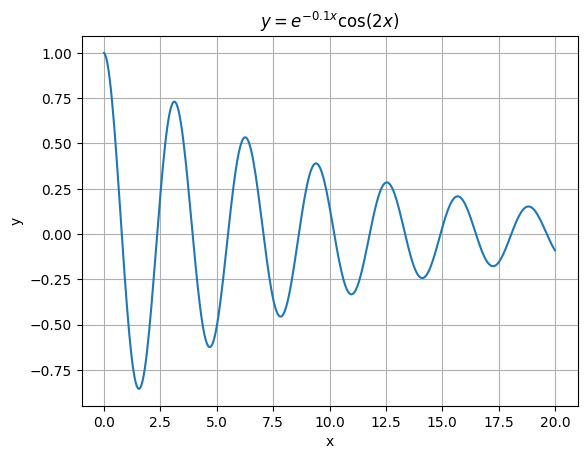

In [ ]:
# 先來解釋一下 以下的意思

x = np.linspace(0, 20, 400) # np.linspace(a, b, c) 的意思是 from a to b, with c points then x will be an array that contain those points
y = np.exp(-0.1*x)*np.cos(2*x) # 這裡的 y 的值就會是函數帶入 x 的 array

# 然後以下的部分基本上就是在畫圖而已
plt.plot(x, y) # 那把 x 跟 y 的數值陣列 帶入
plt.title(r"$y = e^{-0.1x}\cos(2x)$") # 這是標題名稱
plt.xlabel("x") # x 軸 的名稱
plt.ylabel("y") # y 軸 的名稱
plt.grid(True) # 顯示 網格
plt.show()

# GPT 時間
以下我有跟 ChatGPT 聊到說我現在在再做一個課程的東西，然後需要用到 python matlab 跟 numpy 來做圖

然後我有給他看了我前面的 examples
然後請他開始秀肌肉
叫他給我一個比較 fancy 的圖
然後他就給我了一個

“Lorenz 吸引子”

No ideas what it means,
It looks fancy though
圖可以參考這的連結 或者是直接運行


https://share.cleanshot.com/7K8hmcvX


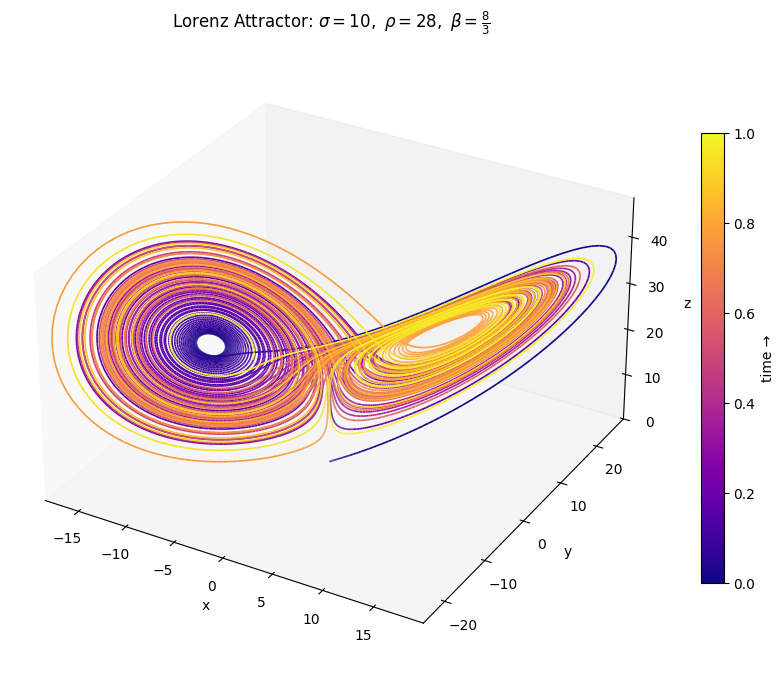

In [ ]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# ---------- Lorenz 系統參數 ----------
sigma = 10.0
rho   = 28.0
beta  = 8.0 / 3.0

def lorenz(X):
    x, y, z = X
    return np.array([
        sigma * (y - x),
        x * (rho - z) - y,
        x * y - beta * z
    ])

# ---------- 數值積分（RK4） ----------
dt = 0.005     # 時間步長
N  = 20000     # 總步數（越大軌跡越細）
X  = np.zeros((N, 3))
X[0] = np.array([0.1, 0.0, 0.0])  # 初始條件

for i in range(N - 1):
    k1 = lorenz(X[i])
    k2 = lorenz(X[i] + 0.5 * dt * k1)
    k3 = lorenz(X[i] + 0.5 * dt * k2)
    k4 = lorenz(X[i] + dt * k3)
    X[i + 1] = X[i] + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

xs, ys, zs = X[:, 0], X[:, 1], X[:, 2]
t = np.linspace(0.0, 1.0, N)  # 用時間做顏色漸層

# ---------- 3D 平滑漸層線 ----------
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 把點組成線段集合，才能做連續漸層線
points   = np.array([xs, ys, zs]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

norm = plt.Normalize(t.min(), t.max())
lc = Line3DCollection(segments, cmap='plasma', norm=norm)
lc.set_array(t[:-1])
lc.set_linewidth(1.2)
ax.add_collection(lc)

# 設定座標範圍（Line3DCollection 需要明確的限界）
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

ax.set_title(r"Lorenz Attractor: $\sigma=10,\ \rho=28,\ \beta=\frac{8}{3}$")
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
ax.set_box_aspect((1, 1, 0.6))
ax.grid(False)

cb = fig.colorbar(lc, pad=0.05, shrink=0.7)
cb.set_label("time →")

# 好看一點的視角
ax.view_init(elev=30, azim=-60)

plt.tight_layout()
# 想存檔就打開下一行
# plt.savefig("lorenz_attractor_smooth.png", dpi=300, bbox_inches="tight")
plt.show()
